
**Naive Bayes**

In [1]:
import pandas as pd


URL_Framingham_training='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Training'
URL_Framingham_test='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Test'

Framingham_test = pd.read_csv('https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Test')
Framingham_training = pd.read_csv('https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/Framingham_Training')


Framingham_test

,Index,Sex,Age,Educ,Death
0,4,2,52,2,0
1,6,1,48,1,0
2,10,2,46,3,0
3,14,2,49,2,0
4,16,2,63,1,0
...,...,...,...,...,...
2252,11307,2,56,1,0
2253,11313,1,68,1,1
2254,11323,2,50,1,1
2255,11326,2,58,2,0


1. Convert Death, Sex, and education to factors

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB 
import statsmodels.tools.tools as stattools


X_Death_ind=np.array(Framingham_training['Death'])
X_Death_ind
X_Age_ind=np.array(Framingham_training['Age'])
X_Age_ind
X_Sex_ind=np.array(Framingham_training['Sex'])
X_Sex_ind
X_Educ_ind=np.array(Framingham_training['Educ'])
X_Educ_ind

(X_Age_ind, X_Age_ind_dict)=stattools.categorical(X_Age_ind, drop=True, dictnames=True)
X_Age_ind=pd.DataFrame(X_Age_ind)
X_Age_ind_dict
print(X_Age_ind)

(X_Sex_ind, X_Sex_ind_dict)=stattools.categorical(X_Sex_ind, drop=True, dictnames=True)
X_Sex_ind=pd.DataFrame(X_Sex_ind)
X_Sex_ind_dict
print(X_Sex_ind)

(X_Educ_ind, X_Educ_ind_dict)=stattools.categorical(X_Educ_ind, drop=True, dictnames=True)
X_Educ_ind=pd.DataFrame(X_Educ_ind)
X_Educ_ind_dict
print(X_Educ_ind)

X=pd.concat((X_Age_ind, X_Sex_ind), axis=1)
X2=pd.concat((Framingham_training['Age'], Framingham_training['Sex'],Framingham_training['Educ'], X_Age_ind, X_Sex_ind,X_Educ_ind), axis=1)
X.head(100)
X2.head(100)

Y=Framingham_training['Death']

       0    1    2    3    4    5    6   ...   43   44   45   46   47   48   49
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
7948  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7949  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7950  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7951  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0
7952  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0

[7953 rows x 50 columns]
        0    1

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


2. Create 2 contingency tables, one with death and sex and another with death and educ

In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools

t_ds=pd.crosstab(Framingham_training['Death'],Framingham_training['Sex'])
t_ds['Total']=t_ds.sum(axis=1)
t_ds.loc['Total']=t_ds.sum()
print(t_ds)

t_de=pd.crosstab(Framingham_training['Death'],Framingham_training['Educ'])
t_de['Total']=t_de.sum(axis=1)
t_de.loc['Total']=t_de.sum()
print(t_de)

Sex       1     2  Total
Death                   
0      2113  3422   5535
1      1324  1094   2418
Total  3437  4516   7953
Educ      1     2     3    4  Total
Death                              
0      2060  1825   960  690   5535
1      1244   603   346  225   2418
Total  3304  2428  1306  915   7953


3. Use the tables in previous exercise to calculate

The probability a randomly selected person is alive or dead
The probability a randomly selected person is male
The probability a randomly selected person has an Educ value of 3
The probabilities that a dead person is male with education level 1, and that a living peerson is male with education level 1
the probabilities that a living person is female withe education level 2, and that a dead person is female with education level 2

In [ ]:
print(5538/(5535+2418))
print(11070/(11070+4836))

print((3422+1094)/(3422+1094+2113+1324))

print((960+346)/(11070+4836))

print(1094/(5535+2418))

print((1094/2418)*(1244/4836))
print((3422/5535)*(2060/11070))

print((2113/5355)*(1825/11070))
print((1324/2418)*(603/4836))

0.6963410033949453
0.6959637872500943
0.5678360367157048
0.08210738086256758
0.13755815415566452
0.1163844915545868
0.11504876987944827
0.06505119361806752
0.06827515716493543


4. Create side-by-side bar graphs for death, one with an overlay of Sex and the other with an overlay of Educ

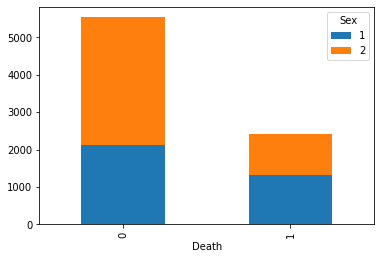

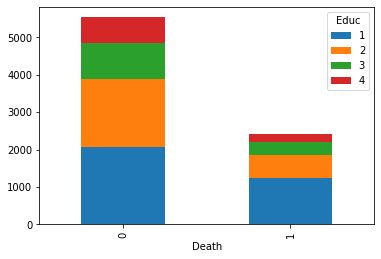

In [ ]:
t_ds_plot=pd.crosstab(Framingham_training['Death'], Framingham_training['Sex'])
t_ds_plot.plot(kind='bar', stacked=True)

t_de_plot=pd.crosstab(Framingham_training['Death'], Framingham_training['Educ'])
t_de_plot.plot(kind='bar', stacked=True)

5. Compute the posterior probability of Death=0 (person is living) for a female with education level 2. Compute the posterior probability of death =1 (person is dead) for a male with education level 1.



In [ ]:
"""p(alive|female2)=p(female2|alive)*p(alive)  /  p(female2)
p(dead|male1)=p(male1|dead)*p(dead)  /  p(male1)"""

t_se=pd.crosstab(Framingham_training['Sex'],Framingham_training['Educ'])
t_se['Total']=t_se.sum(axis=1)
print(t_se)

num1=(2113/5535)*0.696*(1825/5535)
den1=(3437/7953)*(2428/7953)
print(num1/den1)

num2=(1324/2418)*(1-0.696)*(1244/2418)
den2=(4516/7953)*(3304/7953)
print(num2/den2)

Educ     1     2    3    4  Total
Sex                              
1     1507   963  436  531   3437
2     1797  1465  870  384   4516
0.6640030976271231
0.3630256811952236


6. Run the Naive Bayes model on the data set. Display the results in a contingency table. Edit the rows and column names of the table to make the table more readable. Include a total row and column.

In [ ]:
X_Age_ind_test=np.array(Framingham_test['Age'])
(X_Age_ind_test,X_Age_ind_dict_test)=stattools.categorical(X_Age_ind_test,drop=True,dictnames=True)
X_Age_ind_test=pd.DataFrame(X_Age_ind_test)

X_Sex_ind_test=np.array(Framingham_test['Sex'])
(X_Sex_ind_test,X_Sex_ind_dict_test)=stattools.categorical(X_Sex_ind_test,drop=True,dictnames=True)
X_Sex_ind_test=pd.DataFrame(X_Sex_ind_test)

X_Educ_ind_test=np.array(Framingham_test['Educ'])
(X_Educ_ind_test,X_Educ_ind_dict_test)=stattools.categorical(X_Educ_ind_test,drop=True,dictnames=True)
X_Educ_ind_test=pd.DataFrame(X_Educ_ind_test)

X_test=pd.concat((X_Age_ind_test, X_Sex_ind_test, X_Educ_ind_test), axis=1)
X_test

Y_test=Framingham_test['Death']
Y_test

X=pd.concat((X_Age_ind, X_Sex_ind, X_Educ_ind), axis=1)
Y=Framingham_training['Death']

nb_01=MultinomialNB().fit(X_test,Y_test)
nb_01


Y_predicted= nb_01.predict(X_test)

Ypred=pd.crosstab(Framingham_test['Death'],Y_predicted,rownames=['Actual'],colnames=['Predicted'])

Ypred['Total']=Ypred.sum(axis=1);Ypred.loc['Total']=Ypred.sum();Ypred

print(Ypred)

print((1464+221)/2257)

Predicted     0    1  Total
Actual                     
0          1464  133   1597
1           439  221    660
Total      1903  354   2257
0.7465662383695171


## **My comments:**

  The purpose of this workbook is to predict the relationship between death, gender, age, and education level.  However, due to the lack of data information, I have to interpret the data based on my knowledge.  The algorithm used for the prediction is Naïve Bayes.  Naïve Bayes classifier calculates the posterior probability of an event and uses this prior knowledge to make a prediction for the next event.

  To begin with, the author took a look at the data set and did some data cleanings to prepare for later work.  Next, two contingency tables were made for death|sex and death|education.  Based on the contingency tables, the author then calculated the probability.  For example, the probability a randomly selected person is male is 0.5678 (P(male)=male/all), and the probability a randomly selected person has an Educ value of 3 is 0.082 (P(Educ3)=Educ3/all).  After the calculation, the author graphed two stacked bar charts.  Stacked bar charts are good visualizations designed to help the audience simultaneously compare totals.  Lastly, the author fit the multinomial Naïve Bayes classifier into the dataset.  The prediction accuracy rate is 74.66%.



**K means clustering**

In [ ]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans



url_cereals='https://raw.githubusercontent.com/kamranbakhtiari/DESC624/main/cereals.CSV'
cereals=pd.read_csv(url_cereals)

cereals

,Name,Manuf,Type,Calories,Protein,Fat,Sodium,Fiber,Carbo,Sugars,Potass,Vitamins,Shelf,Weight,Cups,Rating,Cold,Nabisco,Quaker,Kelloggs,GeneralMills,Ralston,AHFP
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,1,1,0,0,0,0,0
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,1,0,1,0,0,0,0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,1,0,0,1,0,0,0
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,1,0,0,1,0,0,0
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,1,0,0,0,1,0,0
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,1,0,0,0,1,0,0
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,1,0,0,0,0,1,0
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,1,0,0,0,1,0,0



7. Subset the Fat and Sodium variables into their own data frame, X. Standardize the data set

In [ ]:
X=cereals[['Fat','Sodium']]
print(X)

Xz=pd.DataFrame(stats.zscore(X), columns=['Fat', 'Sodium'])
print(Xz)

    Fat  Sodium
0     1     130
1     5      15
2     1     260
3     0     140
4     2     200
..  ...     ...
72    1     250
73    1     140
74    1     230
75    1     200
76    1     200

[77 rows x 2 columns]
         Fat    Sodium
0  -0.012988 -0.356306
1   3.987349 -1.737087
2  -0.012988  1.204578
3  -1.013072 -0.236238
4   0.987096  0.484170
..       ...       ...
72 -0.012988  1.084510
73 -0.012988 -0.236238
74 -0.012988  0.844374
75 -0.012988  0.484170
76 -0.012988  0.484170

[77 rows x 2 columns]


 Run k-means clustering on the data set, usng three clusters

In [ ]:
kmeans=KMeans(n_clusters=3).fit(Xz)
print(kmeans)

cluster=kmeans.labels_
print(cluster)

Cluster1=Xz.loc[cluster == 0]
Cluster2=Xz.loc[cluster == 1]
Cluster3=Xz.loc[cluster == 2]

KMeans(n_clusters=3)
[0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 2 0 1 2 0 0 0 0 0 2 1 0 0 2 0 0 0 1 1 0
 0 0 0 0 1 0 2 1 1 1 0 0 1 0 1 0 0 2 2 0 2 0 1 2 0 0 2 2 2 2 0 2 0 0 0 0 0
 0 0 0]


9. Obtain the summary of each variable witin each cluster and use the summaries to identify:

A low fat, low sodium cluster
A low fat, high sodium cluster
A high fat, high sodium cluster

In [ ]:
print(Cluster1.describe())
print(Cluster2.describe())
print(Cluster3.describe())

             Fat     Sodium
count  44.000000  44.000000
mean   -0.376655   0.500543
std     0.486648   0.596188
min    -1.013072  -0.416340
25%    -1.013072   0.123966
50%    -0.012988   0.484170
75%    -0.012988   0.874391
max    -0.012988   1.924986
             Fat     Sodium
count  19.000000  19.000000
mean    1.408184   0.063932
std     0.768598   0.739608
min     0.987096  -1.737087
25%     0.987096  -0.236238
50%     0.987096   0.003898
75%     1.987181   0.604238
max     3.987349   1.564782
             Fat     Sodium
count  14.000000  14.000000
mean   -0.727334  -1.659901
std     0.611301   0.410850
min    -1.013072  -1.917189
25%    -1.013072  -1.917189
50%    -1.013072  -1.917189
75%    -1.013072  -1.466934
max     0.987096  -0.836578


## **My comments:**

The purpose of this workbook is to find out the clusters of the cereals data set.  The algorithm used for the prediction is K Means clustering.  Clustering is a useful technique when the data are unlabeled, and it would help users to classify the data by its similarity.  Although there are many variables, the author only used ‘Fat’ and ‘Sodium’ as the factors for clustering.

First, the author calculated the z-score of these two variables to standardize the data set.  When making K Means prediction, the author assigned “3” as the desired grouping numbers for the outcome.  However, it is hard to distinguish the profile of these three clusters because it only shows the numbers that represent the clusters.  An easy way to get a better understanding of the clusters is to use ‘describe’ to find out the grouping criteria.  For example, the cluster 1 describe shows the data are relatively high fat and high sodium, the cluster 2 describe shows the data are relatively low fat and high sodium, and the cluster 3 describe shows the data are relatively low fat and low sodium.  In addition, we can also see that there are 44, 19, and 14 counts, respectively, in these clusters.
